In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [2]:
def display_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]

    proc_group = groups['data'][0]
    ax = axes[0]
    ax.set_title(proc_group['name'])
    for bench in proc_group['data']:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()

    matrix_group = groups['data'][1]
    ax = axes[1]
    ax.set_title(matrix_group['name'])
    for bench in matrix_group['data']:
        x = [run['matrix_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['processor_size'])]))
        #ax.set_yscale('log',base=2)
    ax.legend()

In [3]:
def display_relative_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]

    proc_group = groups['data'][0]
    ax = axes[0]
    ax.set_title(proc_group['name'])
    base = proc_group['data'][0]
    for bench in proc_group['data'][1:]:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] - brun['mean'] for run,brun in zip(bench['data'], base['data'])]
        ax.plot(x,y, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()

    matrix_group = groups['data'][1]
    ax = axes[1]
    base = matrix_group['data'][0]
    for bench in matrix_group['data'][1:]:
        x = [run['matrix_size'] for run in bench['data']]
        y = [run['mean'] - brun['mean'] for run,brun in zip(bench['data'], base['data'])]
        ax.plot(x,y, label=" ".join([bench['name'], str(bench['data'][0]['processor_size'])]))
        #ax.set_yscale('log',base=2)
    ax.legend()

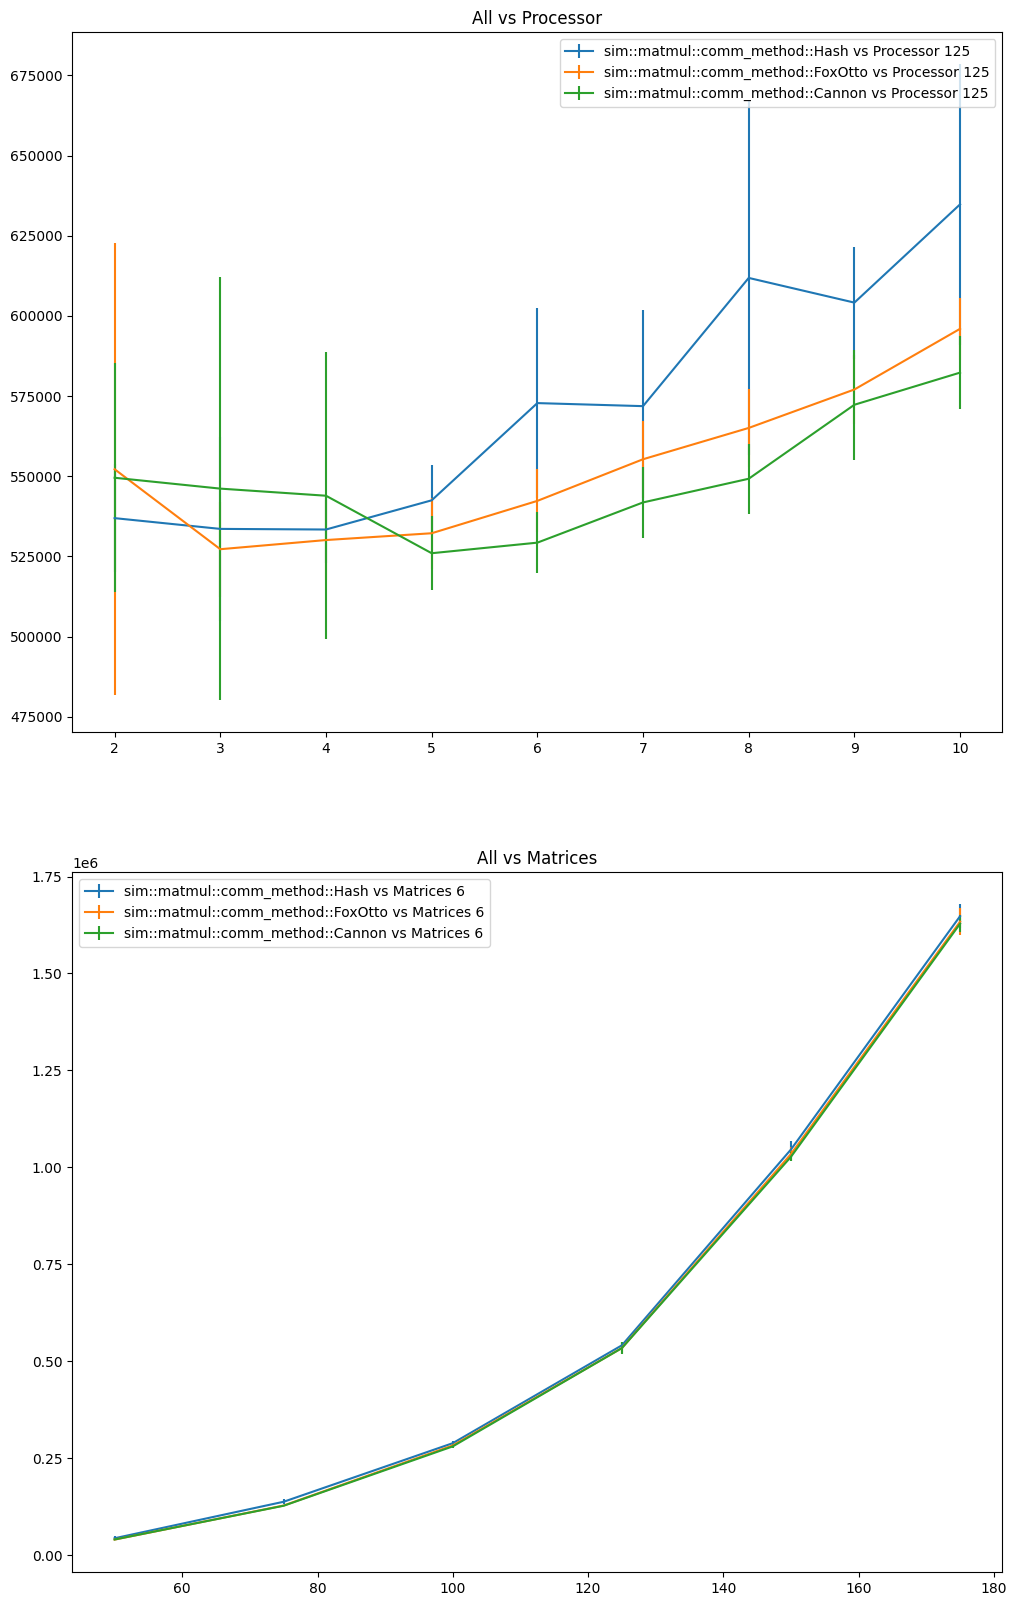

In [4]:
display_benchmark("../data_local.json")

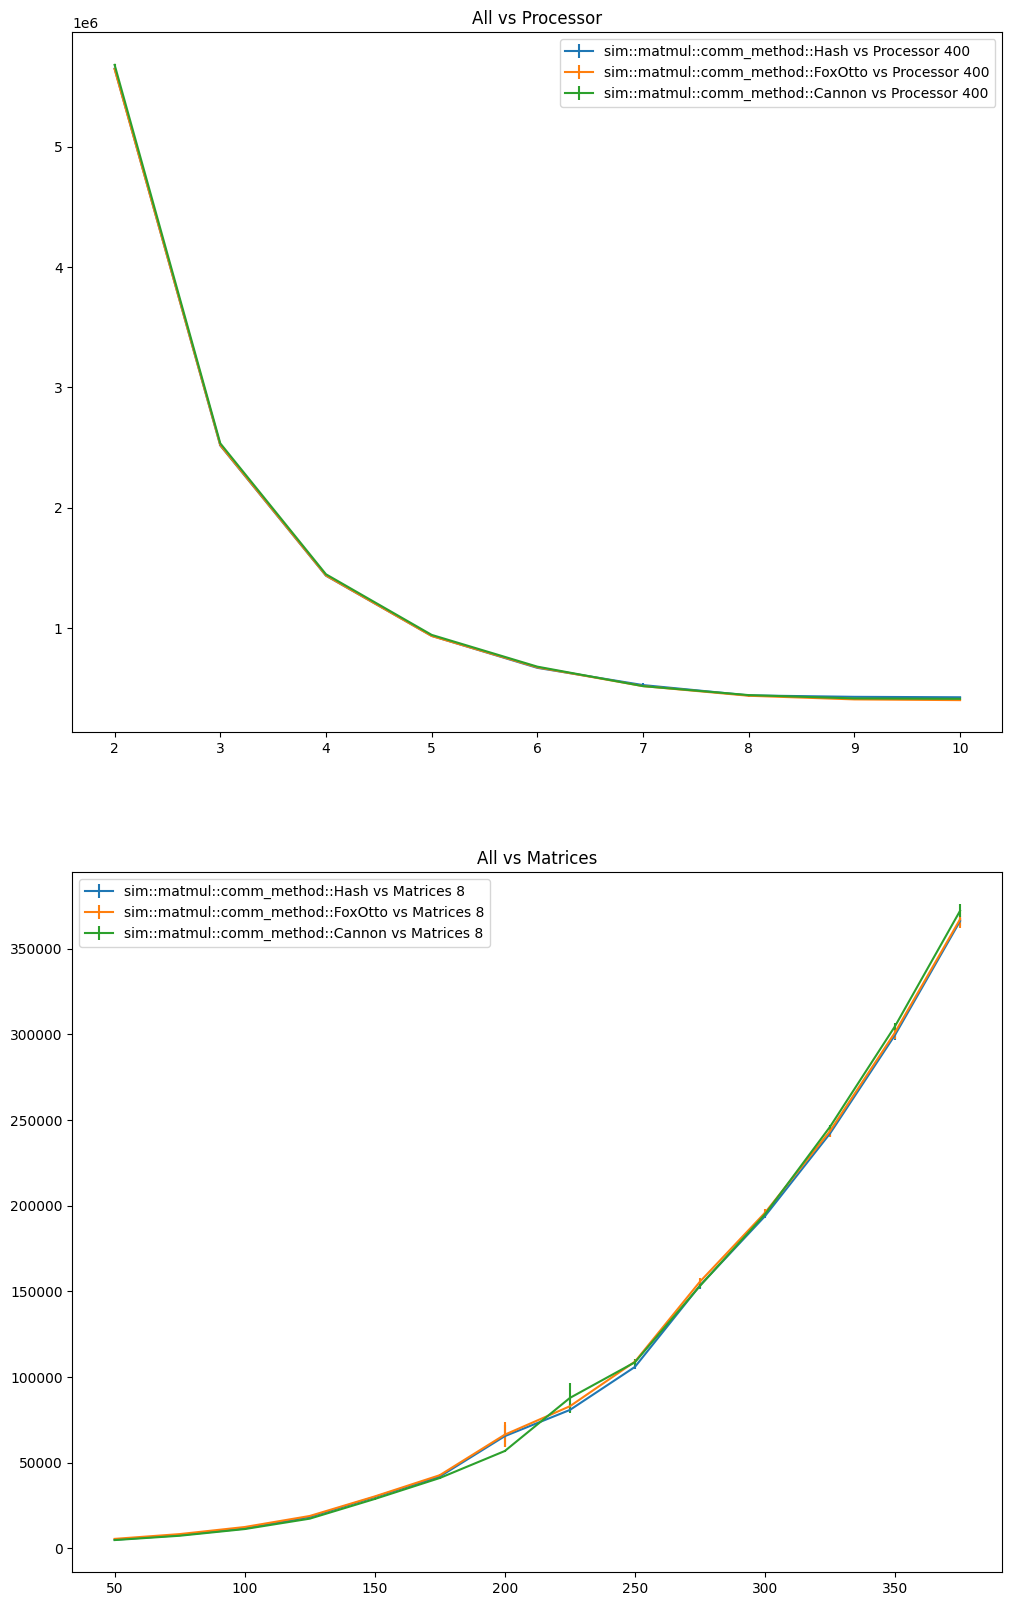

In [5]:
display_benchmark("../data_remote1.json")

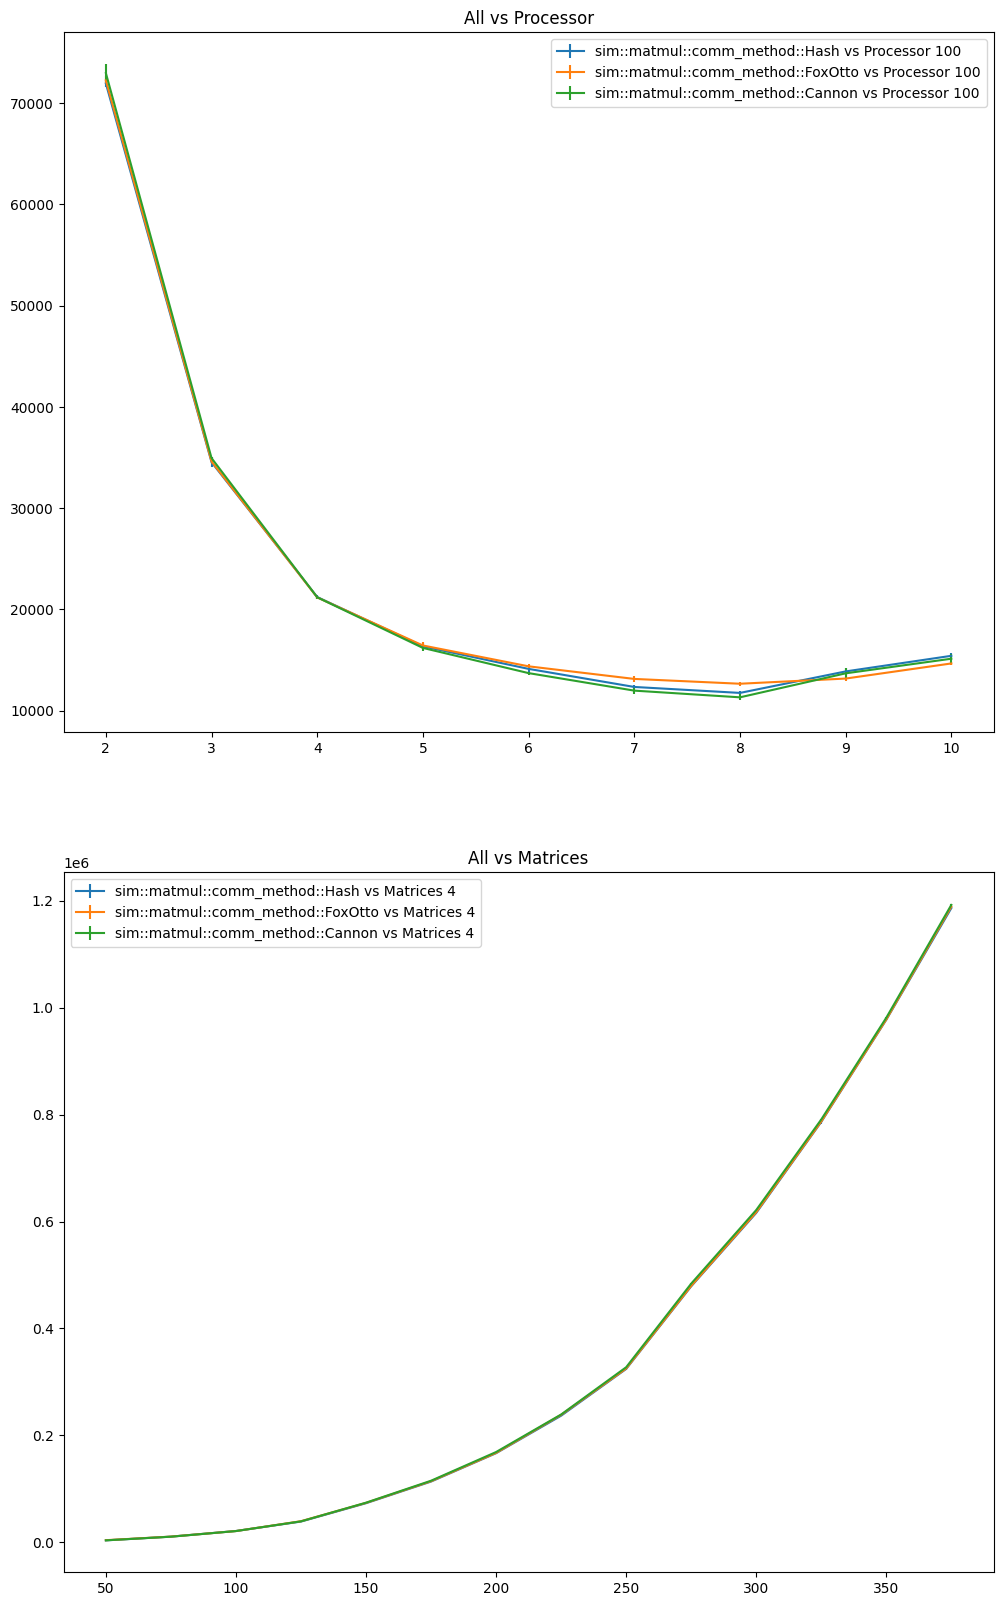

In [6]:
display_benchmark("../data_remote2.json")

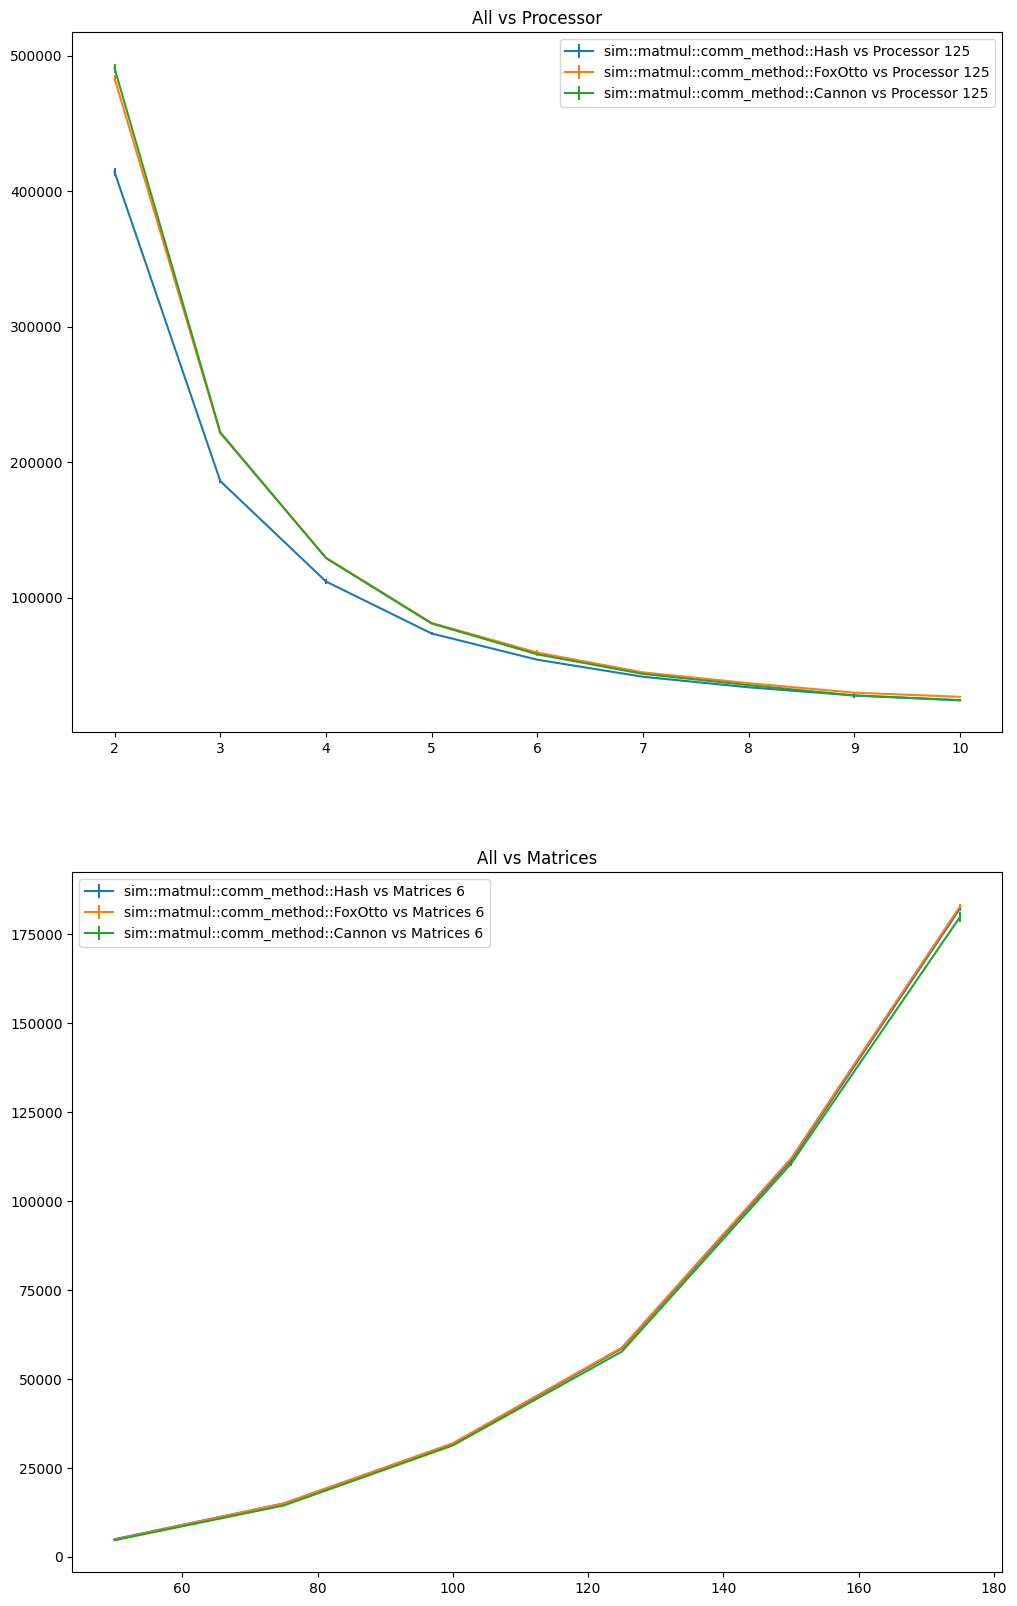

In [7]:
display_benchmark("../data.json")

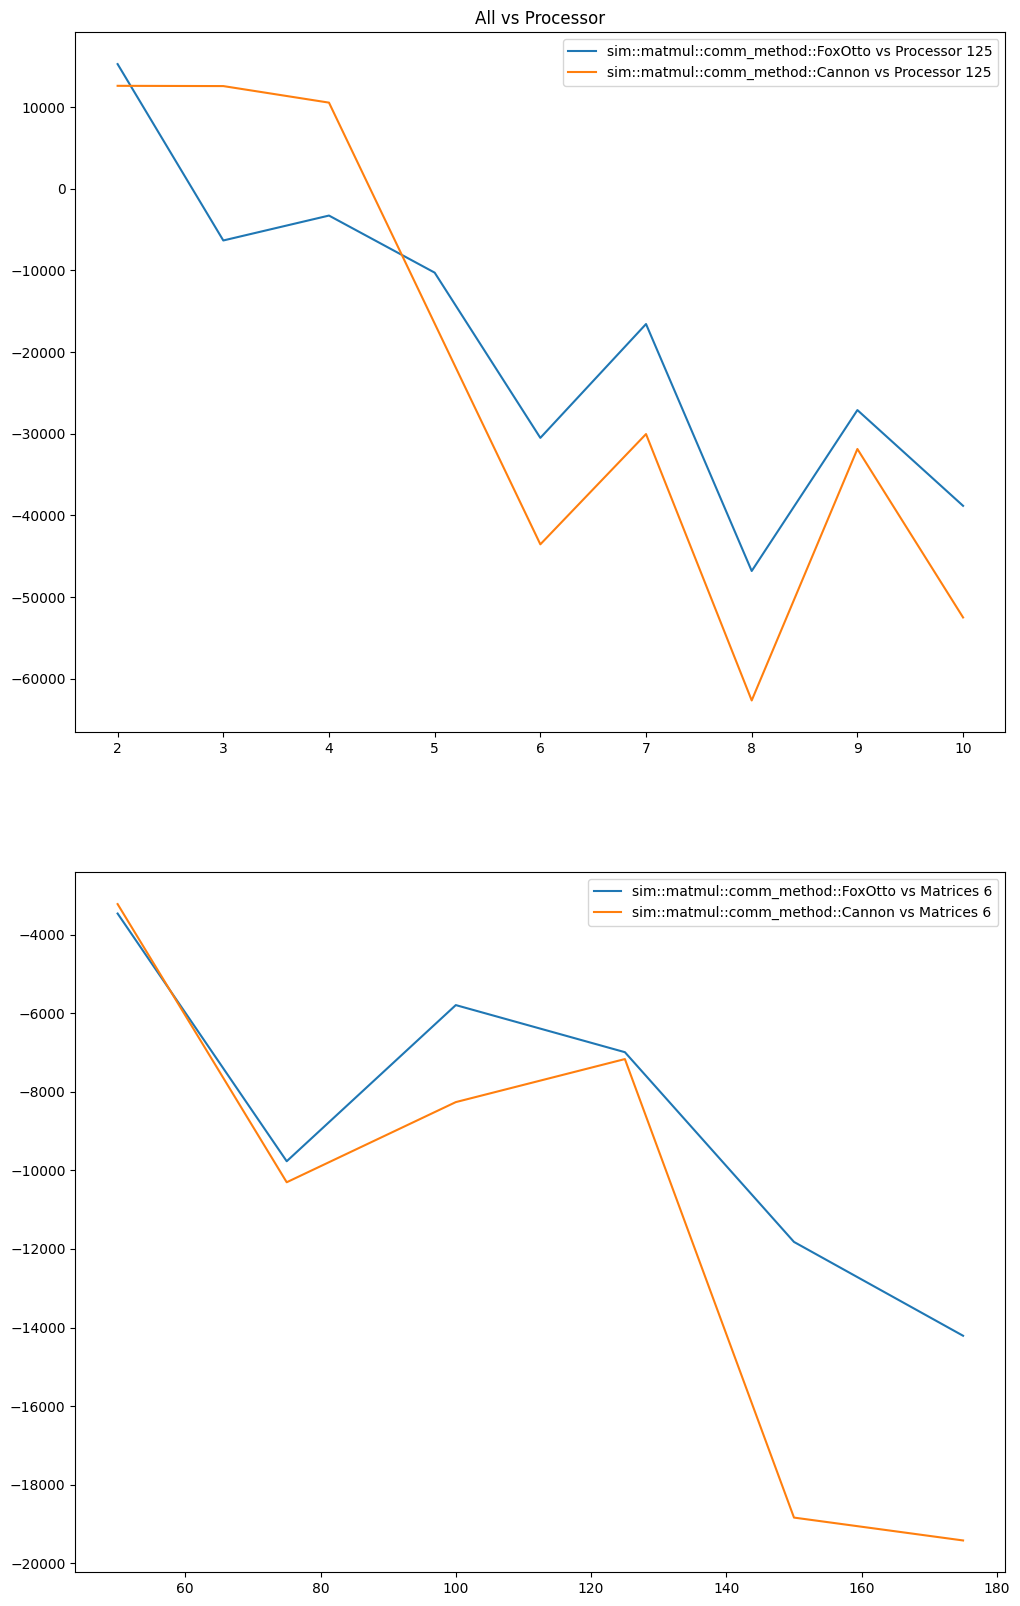

In [25]:
display_relative_benchmark("../data_local.json")

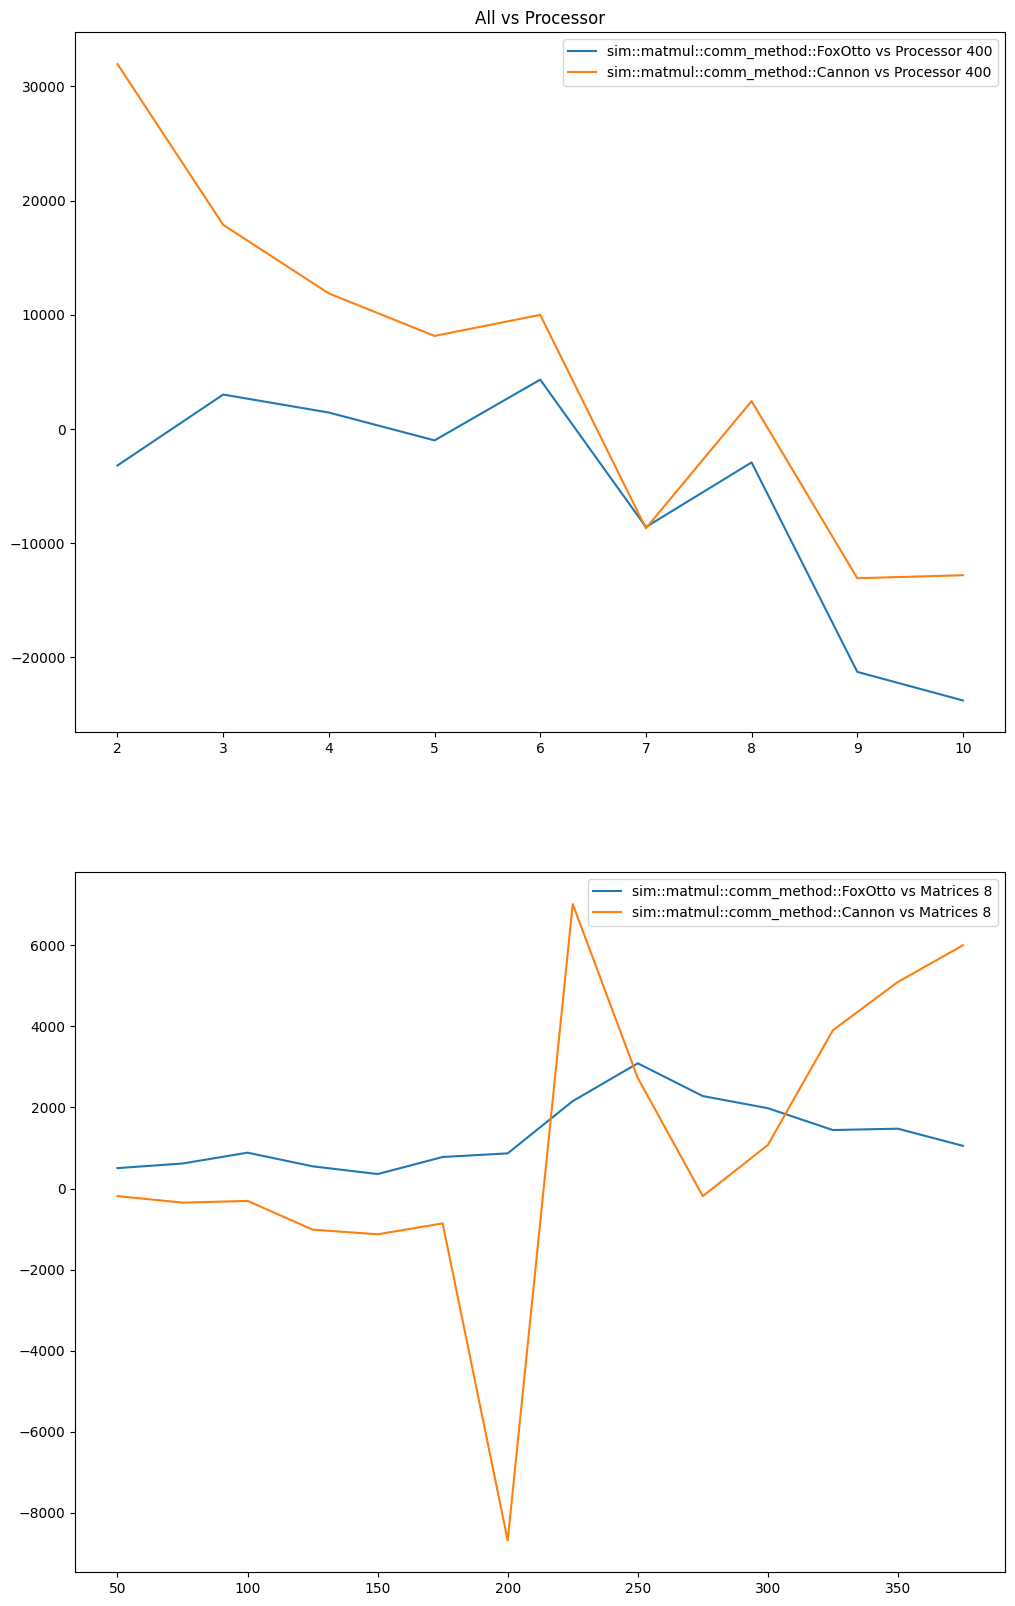

In [26]:
display_relative_benchmark("../data_remote1.json")

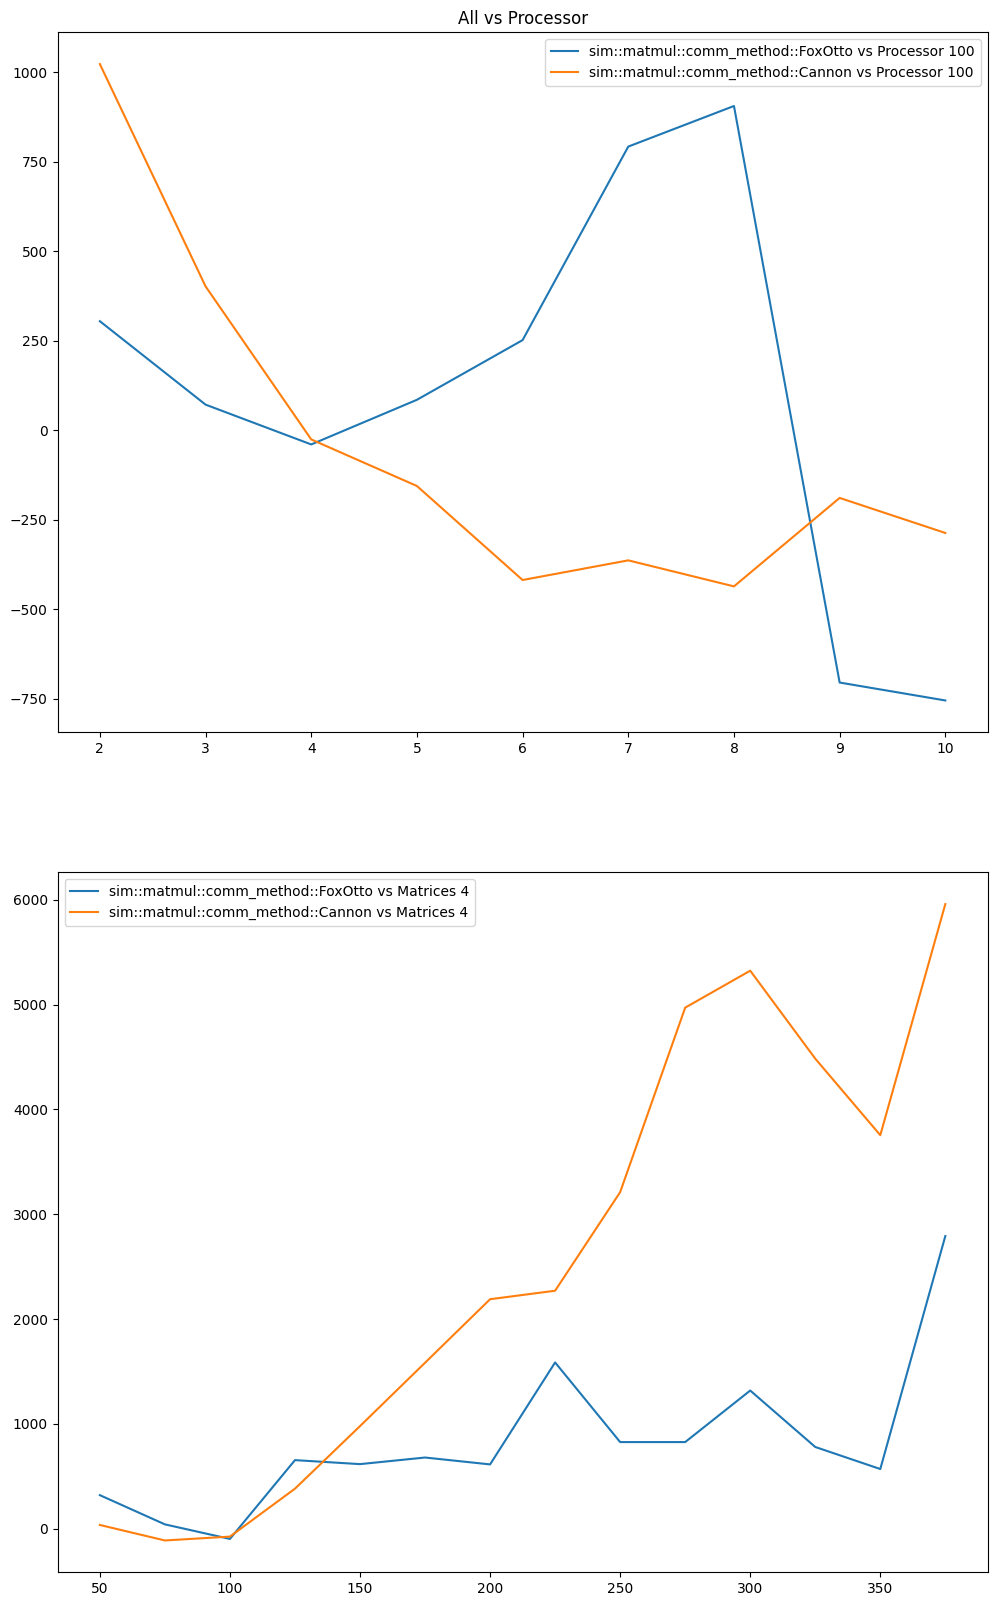

In [27]:
display_relative_benchmark("../data_remote2.json")

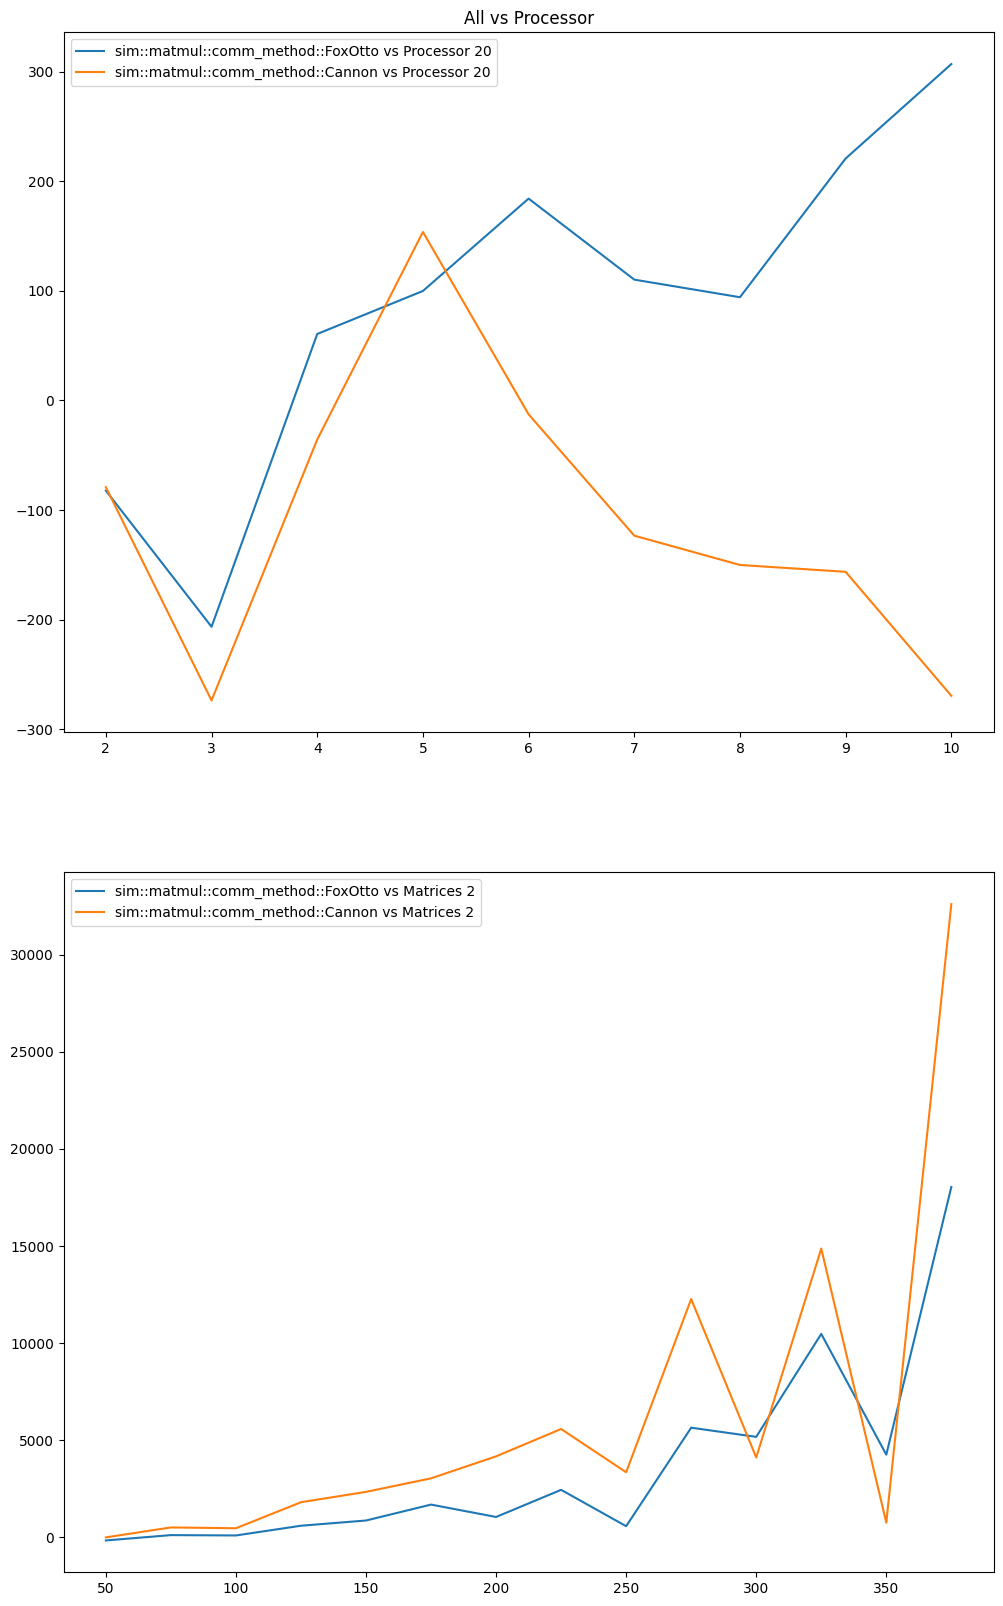

In [29]:
display_relative_benchmark("../data.json")